In [2]:
import paddle,os
import paddle.fluid as fluid
from paddle.fluid.dygraph import Linear
import numpy as np
from PIL import Image

In [3]:
trainset = paddle.dataset.mnist.train() #读取mnist 数据训练集
train_reader = paddle.batch(trainset,batch_size=8) #设置读取器

图像数据形状和对应数据为: (8, 784) [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -

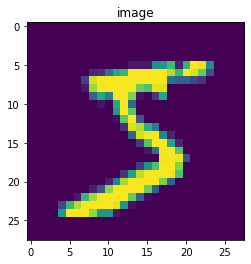

In [4]:
for batch_id, data in enumerate(train_reader()):
    img_data = np.array([x[0] for x in data]).astype('float32')
    label_data = np.array([x[1] for x in data]).astype('float32')
    print('图像数据形状和对应数据为:',img_data.shape,img_data[0])
    print('图像标签形状和对应数据为:',label_data.shape,label_data[0])
    break

print('\n 打印第一个 batch 的第一个图像,对应标签数字为{}'.format(label_data[0]))
import matplotlib.pyplot as plt
img = np.array(img_data[0]+1)*127.5
img = np.reshape(img,[28,28]).astype(np.uint8)

plt.figure('Image')
plt.imshow(img)
plt.axis('on')
plt.title('image')
plt.show()

In [9]:
class MNIST(fluid.dygraph.Layer):
    def __init__(self,name_scope):
        super(MNIST,self).__init__(name_scope)
        name_scope = self.full_name()
        self.fc = Linear(input_dim=784,output_dim=1,act=None)
        
    def forward(self,inputs):
        outputs = self.fc(inputs)
        return outputs

In [10]:
with fluid.dygraph.guard():
    model = MNIST('mnist')
    model.train()
    train_loader = paddle.batch(paddle.dataset.mnist.train(), batch_size=16)
    optimizer = fluid.optimizer.SGDOptimizer(learning_rate=0.001,parameter_list=model.parameters())